In [1]:
import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Prepare the data
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Load and preprocess your sentiment analysis dataset
# Replace 'your_dataset_file.txt' with the path to your dataset file

texts_train = []  # List of training texts
labels_train = []  # List of training labels
texts_val = []  # List of validatiowiedni[efnoiaeswio0fjngteawasedfg] texts
labels_val = []  # List of validation labels

# Read the dataset file and extract texts and labels
with open('data/Data clear.csv', 'r', encoding='utf-8') as file:
    for line in file:
        if len(line.strip().split(';')) == 2:
            text, label = line.strip().split(';')
            try:
                texts_train.append(text)
                labels_train.append(int(label))
            except ValueError:
                continue  # Skip samples with invalid labels

c:\Users\Fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(texts_train)

1060

In [4]:
# Split the data into training and validation sets
split_ratio = 0.8  # Adjust the split ratio as needed
split_index = int(len(texts_train) * split_ratio)

In [5]:
texts_val = texts_train[split_index:]
labels_val = labels_train[split_index:]
texts_train = texts_train[:split_index]
labels_train = labels_train[:split_index]

In [6]:
len(texts_train)

848

In [7]:
# Tokenize the training texts and convert them into input features suitable for BERT
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

input_ids_train = []
attention_mask_train = []

# Tokenize and encode each training text
for text in texts_train:
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    input_ids_train.append(encoding['input_ids'][0])
    attention_mask_train.append(encoding['attention_mask'][0])

# Convert the lists to TensorFlow tensors
input_ids_train = tf.convert_to_tensor(input_ids_train)
attention_mask_train = tf.convert_to_tensor(attention_mask_train)
labels_train = tf.convert_to_tensor(labels_train)

# Tokenize the validation texts and convert them into input features suitable for BERT
input_ids_val = []
attention_mask_val = []

# Tokenize and encode each validation text
for text in texts_val:
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    input_ids_val.append(encoding['input_ids'][0])
    attention_mask_val.append(encoding['attention_mask'][0])

# Convert the lists to TensorFlow tensors
input_ids_val = tf.convert_to_tensor(input_ids_val)
attention_mask_val = tf.convert_to_tensor(attention_mask_val)
labels_val = tf.convert_to_tensor(labels_val)

In [141]:
# # Tokenize the texts and convert them into input features suitable for BERT
# tokenized_inputs_train = tokenizer.batch_encode_plus(
#     texts_train,
#     padding=True,
#     truncation=True,
#     max_length=128,
#     return_tensors='tf'
# )

# tokenized_inputs_val = tokenizer.batch_encode_plus(
#     texts_val,
#     padding=True,
#     truncation=True,
#     max_length=128,
#     return_tensors='tf'
# )

# input_ids_train = tokenized_inputs_train['input_ids']
# attention_mask_train = tokenized_inputs_train['attention_mask']
# input_ids_val = tokenized_inputs_val['input_ids']
# attention_mask_val = tokenized_inputs_val['attention_mask']


In [142]:
# # Convert the labels to TensorFlow tensors
# labels_train = tf.convert_to_tensor(labels_train)
# labels_val = tf.convert_to_tensor(labels_val)

In [143]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score
from itertools import product

# Define the hyperparameters to search
learning_rates = [1e-5, 2e-5, 3e-5]
batch_sizes = [16, 32]
num_epochs = [3, 5]

best_accuracy = 0.0
best_hyperparameters = {}

# Perform grid search
for learning_rate, batch_size, num_epochs in product(learning_rates, batch_sizes, num_epochs):
    # Define the model
    model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels=2)

    # Modify the output layer
    model.layers[-1].activation = tf.keras.activations.sigmoid

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    # Train the model
    model.fit(
        [input_ids_train, attention_mask_train],
        labels_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=([input_ids_val, attention_mask_val], labels_val),
        verbose=0
    )

    # Evaluate the model on validation data
    y_pred_val = model.predict([input_ids_val, attention_mask_val])
    y_pred_val = tf.argmax(y_pred_val.logits, axis=1)
    accuracy = accuracy_score(labels_val, y_pred_val)

    # Check if this model has the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = {
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'num_epochs': num_epochs
        }

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 13s 539ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 13s 450ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 15s 865ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 16s 753ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 14s 687ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 17s 809ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 19s 1s/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 111s 5s/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 157s 6s/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 17s 869ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 15s 688ms/step


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 15s 1s/step
Best Hyperparameters: {'learning_rate': 1e-05, 'batch_size': 16, 'num_epochs': 3}
Best Accuracy: 1.0


In [8]:
# Build the model
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels=2)

# Modify the output layer
model.layers[-1].activation = tf.keras.activations.sigmoid

# Compile the model with binary cross-entropy loss
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metric = tf.keras.metrics.BinaryAccuracy(threshold=0.5)

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(
    x=[input_ids_train, attention_mask_train],
    y=tf.keras.utils.to_categorical(labels_train, num_classes=2),
    batch_size=16,
    epochs=3,
    validation_data=([input_ids_val, attention_mask_val], tf.keras.utils.to_categorical(labels_val, num_classes=2))
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
53/53 [==============================] - 780s 14s/step - loss: 0.4693 - binary_accuracy: 0.7836 - val_loss: 0.2799 - val_binary_accuracy: 0.9151
Epoch 2/3
53/53 [==============================] - 753s 14s/step - loss: 0.1227 - binary_accuracy: 0.9652 - val_loss: 0.2934 - val_binary_accuracy: 0.9057
Epoch 3/3
53/53 [==============================] - 682s 13s/step - loss: 0.0501 - binary_accuracy: 0.9894 - val_loss: 0.2826 - val_binary_accuracy: 0.9009


In [145]:
# # Fine-tune the model on your specific sentiment analysis task
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# history = model.fit(
#         x=[input_ids_train, attention_mask_train],
#         y=labels_train,
#         validation_data=([input_ids_val, attention_mask_val], labels_val),
#         batch_size=32,
#         epochs=1
# )

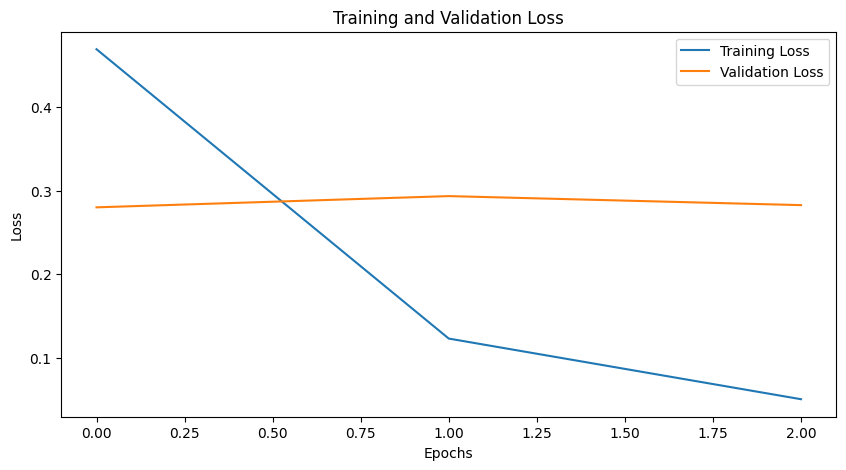

In [12]:
# Lists to store the values for plotting
train_loss_values = history.history['loss']
train_acc_values = history.history['binary_accuracy']
val_loss_values = history.history['val_loss']
val_acc_values = history.history['val_binary_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

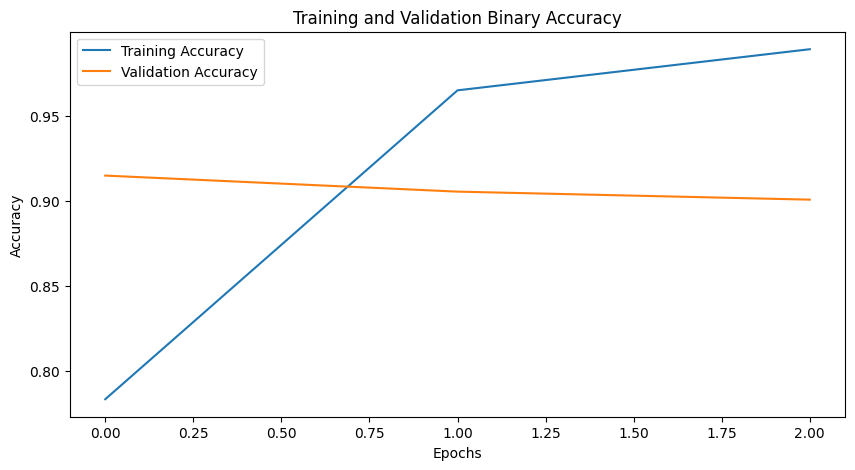

In [13]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.legend()
plt.show()

In [16]:
# Save the fine-tuned model in the TensorFlow SavedModel format
model.save('model/saved_model')

model.save_pretrained("model/nnmodel")

# Alternatively, you can save the model weights
model.save_weights('model/model_weights.h5')

INFO:tensorflow:Assets written to: model/saved_model\assets


INFO:tensorflow:Assets written to: model/saved_model\assets
